In [ ]:
import csv
import json
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
dataset = pd.read_csv('data-2018-structure-1.csv') 
dataset

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре"
0,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9897035,Заклинаю-помните,Исупов Т.,Прочие виды и жанры драмтеатра,Российские национальные произведения,Адыгея,Для юношества,Местное,1712,21.0,16.0,2.67,2.21
1,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,5231058,Женихи,Мамий Е.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,9912,2.0,2.0,0.10,0.10
2,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,101095,Сказание о нарте Саусоруко,Адыгейский эпос,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,0810,2.0,NaN,0.32,NaN
3,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9204075,Свирель Ашамеза,Хакуй А.,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,1404,30.0,2.0,3.40,0.14
4,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,8804075,Город без любви,Устинов Л.,Сказка,Произведения советских авторов,Россия,Для детей среднего школьного возраста,Местное,1511,10.0,NaN,0.70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,975,г.Севастополь,48067,Севастопольский театр юного зрителя,"ТЮЗы,детские театры",9999992,Концерт,Разные авторы,Прочие виды и жанры музыкального театра,Значение не определено,Значение не определено,Для взрослых,Местное,1706,28.0,28.0,2.82,2.82
18822,975,г.Севастополь,48067,Севастопольский театр юного зрителя,"ТЮЗы,детские театры",8708041,Ася,Тургенев И.С.,Пьеса,Русские классические произведения,Россия,Для юношества,Местное,1811,10.0,8.0,1.68,1.48
18823,975,г.Севастополь,48067,Севастопольский театр юного зрителя,"ТЮЗы,детские театры",910015,Бамбуковый остров,Богачева Н.,Сказка,Российские современные произведения с 1992 г.,Россия,Для детей младшего школьного возраста,Местное,1806,10.0,10.0,1.32,1.32
18824,975,г.Севастополь,48067,Севастопольский театр юного зрителя,"ТЮЗы,детские театры",4228058,"Еще раз про Красную Шапочку ( Здравствуй, Крас...","Коган С., Ефремов С.",Сказка,Произведения советских авторов,Россия,Для детей дошкольного возраста,Местное,0305,13.0,5.0,1.91,0.63


In [ ]:
dataset.isnull().sum()

Код субъекта                                               0
Название субъекта                                          0
Код КОПУК                                                  0
Название театра                                            0
Жанр театра                                                0
Код произведения                                           0
Название произведения                                      0
Авторы                                                   210
Жанр произведения                                         33
Историко-национальный признак                              0
Национально-территориальный признак                       34
Возрастная категория зрителей                              0
Подчиненность                                              0
Дата постановки                                           21
Число спектаклей, всего                                    4
Число спектаклей, в том числе на стационаре             1222
Число зрителей, тыс. чел

In [ ]:
dataset.head()

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре"
0,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9897035,Заклинаю-помните,Исупов Т.,Прочие виды и жанры драмтеатра,Российские национальные произведения,Адыгея,Для юношества,Местное,1712,21.0,16.0,2.67,2.21
1,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,5231058,Женихи,Мамий Е.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,9912,2.0,2.0,0.10,0.10
2,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,101095,Сказание о нарте Саусоруко,Адыгейский эпос,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,0810,2.0,NaN,0.32,NaN
3,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9204075,Свирель Ашамеза,Хакуй А.,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,1404,30.0,2.0,3.40,0.14
4,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,8804075,Город без любви,Устинов Л.,Сказка,Произведения советских авторов,Россия,Для детей среднего школьного возраста,Местное,1511,10.0,NaN,0.70,NaN


In [ ]:
dataset = dataset.fillna('')

In [ ]:
dataset.isnull().sum()

Код субъекта                                            0
Название субъекта                                       0
Код КОПУК                                               0
Название театра                                         0
Жанр театра                                             0
Код произведения                                        0
Название произведения                                   0
Авторы                                                  0
Жанр произведения                                       0
Историко-национальный признак                           0
Национально-территориальный признак                     0
Возрастная категория зрителей                           0
Подчиненность                                           0
Дата постановки                                         0
Число спектаклей, всего                                 0
Число спектаклей, в том числе на стационаре             0
Число зрителей, тыс. чел., всего                        0
Число зрителей

In [ ]:
dataset.shape

(18826, 18)

In [ ]:
dataset = dataset.drop_duplicates()

## Какие бывают театры?

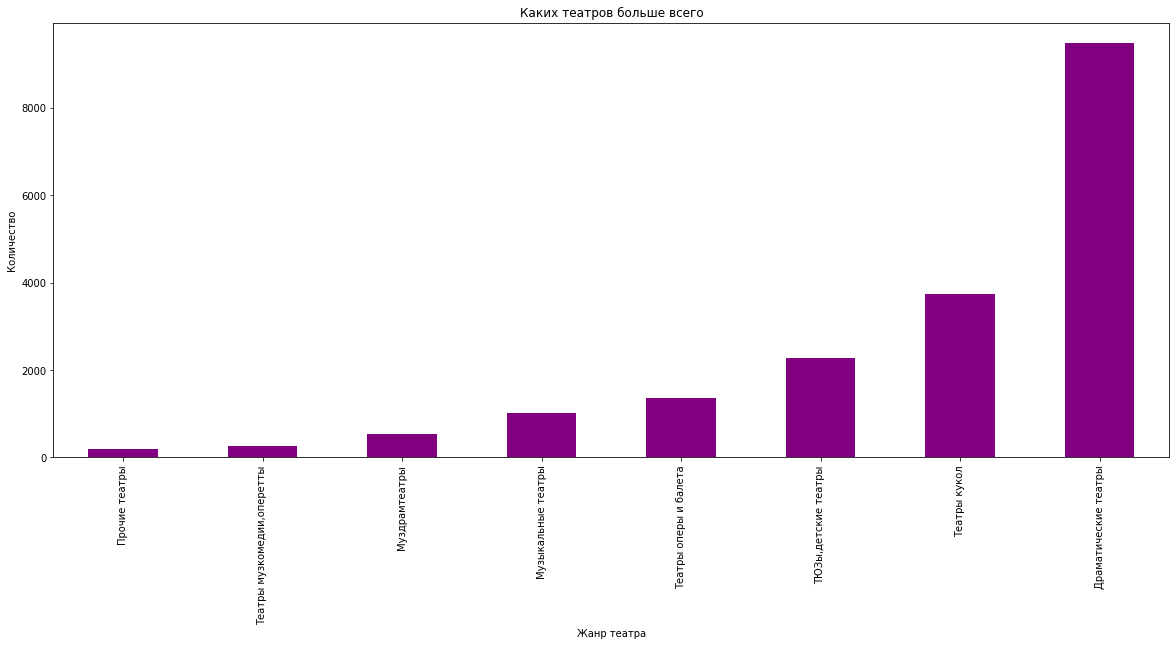

In [549]:
dataset.groupby("Жанр театра")["Название театра"].count().sort_values().plot.bar(color='purple', figsize=(20, 8))
plt.title("Каких театров больше всего")
plt.xlabel('Жанр театра')
plt.ylabel('Количество');

In [553]:
dataset.groupby("Жанр театра")["Жанр произведения"].value_counts()

Жанр театра            Жанр произведения
Драматические театры   Комедия              2377
                       Сказка               2123
                       Драма                1560
                       Инсценировка          771
                       Пьеса                 425
                                            ... 
Театры оперы и балета  Балет-оратория          1
                       Бурлеск                 1
                       Опера-балет             1
                       Опера-оратория          1
                       Триллер                 1
Name: Жанр произведения, Length: 268, dtype: int64

## Сколько в субъектах постановок? Какие самые популярные? Сколько зрителей?


In [ ]:
dataset.describe()

,Код субъекта,Код КОПУК,Код произведения
count,18826.000000,18826.000000,1.882600e+04
mean,607.354244,44995.336290,5.249542e+06
std,306.320422,2690.197413,3.117232e+06
min,10.000000,40027.000000,2.570000e+02
25%,330.000000,42681.000000,2.084274e+06
50%,660.000000,45158.000000,5.423035e+06
75%,920.000000,47171.000000,8.102524e+06
max,975.000000,49996.000000,9.999992e+06


In [ ]:
dataset['Название субъекта'].value_counts()

г.Москва                      2521
г.Санкт-Петербург             1132
Московская обл.                725
Свердловская обл.              535
Челябинская обл.               520
                              ... 
Респ. Адыгея                    44
Респ. Ингушетия                 31
Карачаево-Черкесская Респ.      24
Еврейская авт.обл.              21
Респ. Алтай                     16
Name: Название субъекта, Length: 82, dtype: int64

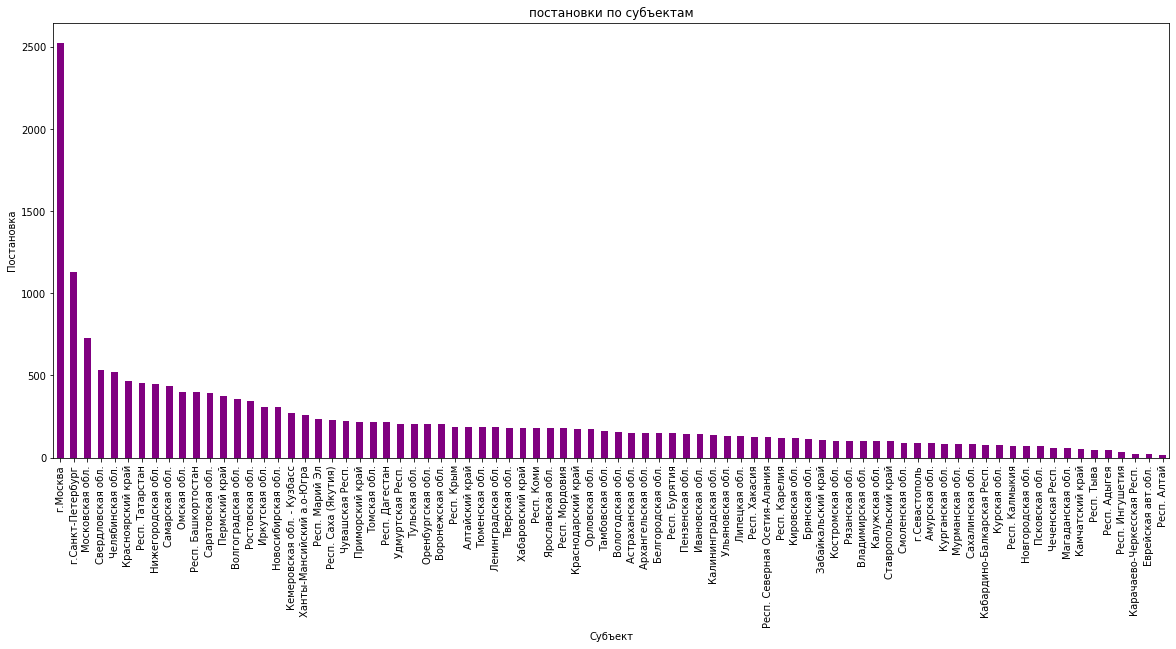

In [ ]:
dataset['Название субъекта'].value_counts().plot.bar(color='purple', figsize=(20, 8));
plt.title("постановки по субъектам")
plt.xlabel('Субъект')
plt.ylabel('Постановка');


In [ ]:
dataset.groupby("Название субъекта")["Название произведения"].value_counts().head(100)

Название субъекта  Название произведения                          
Алтайский край     Театрализованное представление                     4
                   Очень простая история                              3
                   Золотой цыпленок                                   2
                   Квадратура круга                                   2
                   Концерт                                            2
                                                                     ..
                   Обыкновенная история                               1
                   Обыкновенное чудо                                  1
                   Обыкновенные чудики ( по рассказам Шукшина В. )    1
                   Ограбление в полночь                               1
                   Одолжите тенора                                    1
Name: Название произведения, Length: 100, dtype: int64

In [555]:
def to_num(x):
  try:
    x = float(x)
  except ValueError:
    x = x[:4]
  return x
dataset['Дата постановки'] = dataset['Дата постановки'].apply(to_num)
dataset['Число спектаклей, всего'] = dataset['Число спектаклей, всего'].apply(to_num)
dataset['Число зрителей, тыс. чел., всего'] = dataset['Число зрителей, тыс. чел., всего'].apply(to_num)

In [556]:
dataset['Число спектаклей, всего'] = pd.to_numeric(dataset['Число спектаклей, всего'], errors='coerce')
dataset['Дата постановки'] = pd.to_numeric(dataset['Дата постановки'], errors='coerce')
dataset['Число зрителей, тыс. чел., всего'] = pd.to_numeric(dataset['Число зрителей, тыс. чел., всего'], errors='coerce')


Text(0, 0.5, 'Число спектаклей')

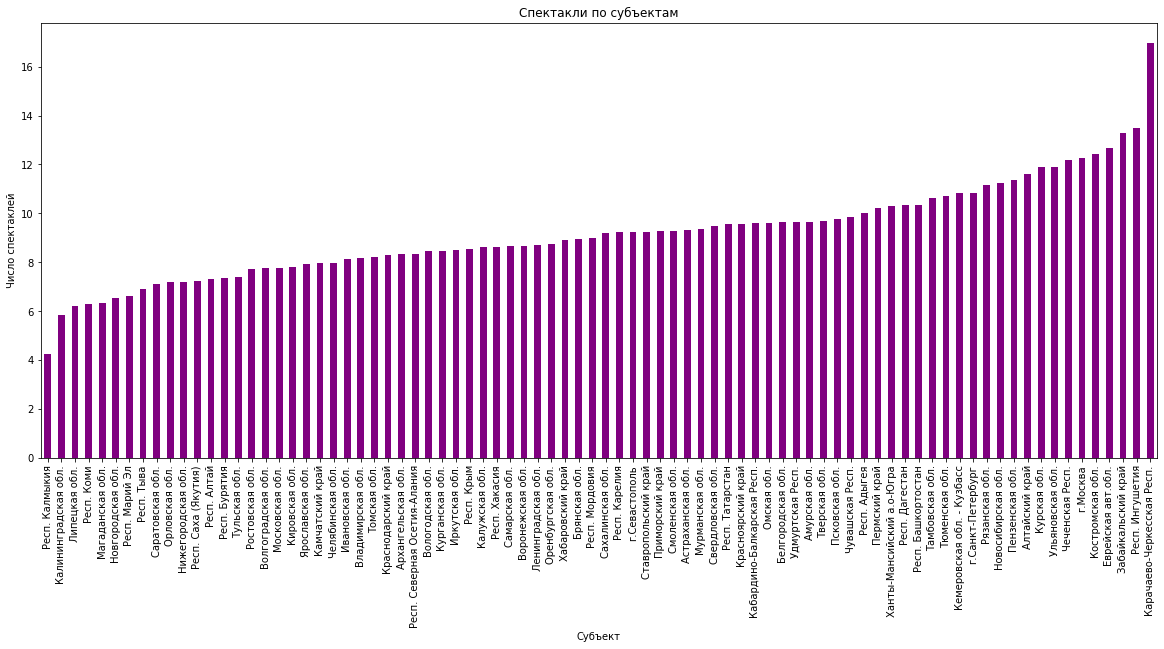

In [ ]:
dataset.groupby("Название субъекта")["Число спектаклей, всего"].mean(numeric_only=True).sort_values().plot.bar(color='purple', figsize=(20, 8))
plt.title("Спектакли по субъектам")
plt.xlabel('Субъект')
plt.ylabel('Число спектаклей')

In [ ]:
mini_df = dataset.loc[dataset['Название субъекта'] == "Карачаево-Черкесская Респ."]

Text(0, 0.5, 'Число спектаклей')

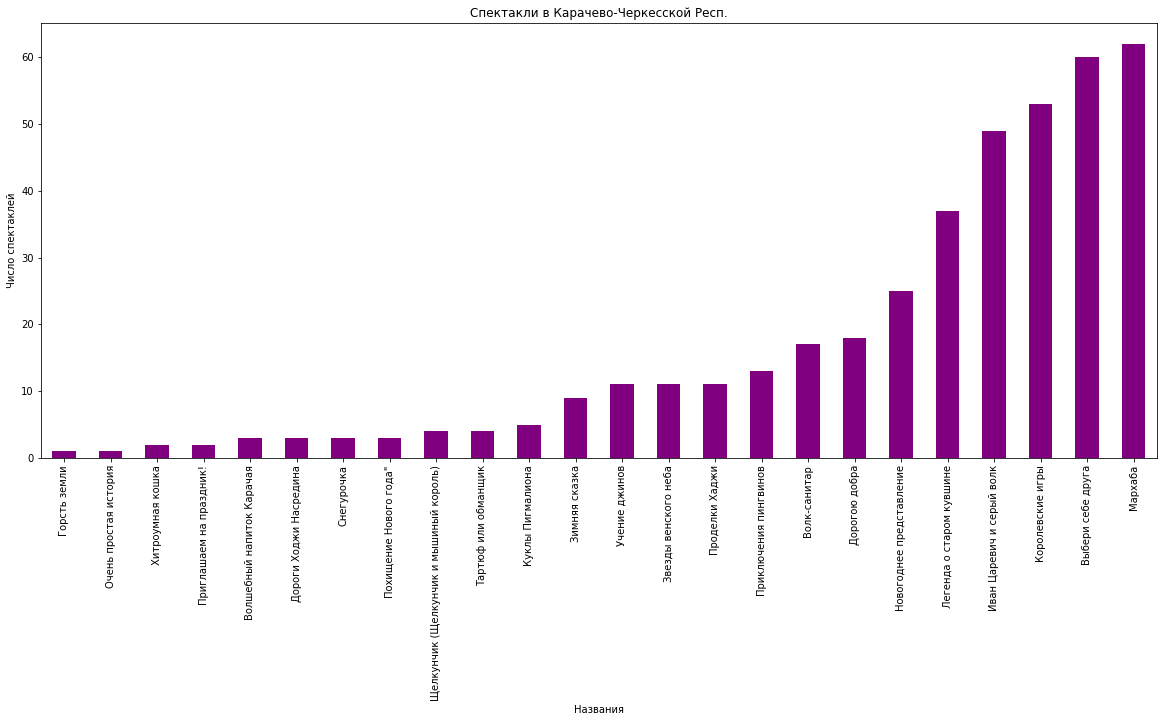

In [ ]:
mini_df.groupby('Название произведения')["Число спектаклей, всего"].mean(numeric_only=True).sort_values().plot.bar(color='purple', figsize=(20, 8))
plt.title("Спектакли в Карачево-Черкесской Респ.")
plt.xlabel('Названия')
plt.ylabel('Число спектаклей')

Text(0, 0.5, 'Число зрителей')

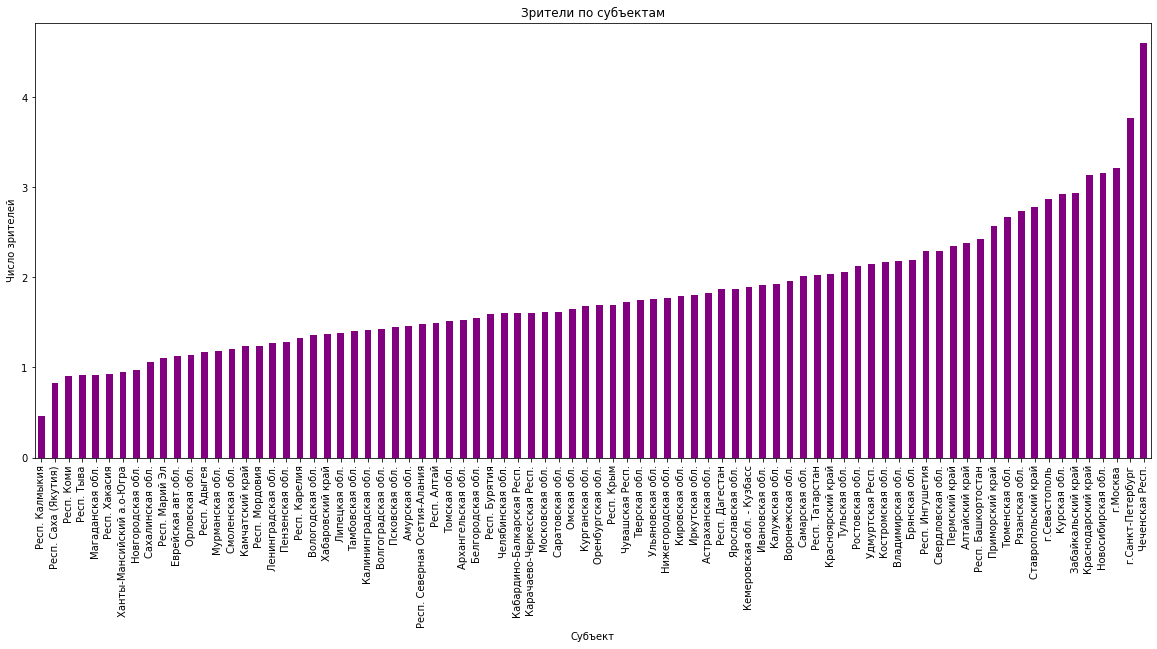

In [ ]:
dataset.groupby("Название субъекта")["Число зрителей, тыс. чел., всего"].mean(numeric_only=True).sort_values().plot.bar(color='purple', figsize=(20, 8))
plt.title("Зрители по субъектам")
plt.xlabel('Субъект')
plt.ylabel('Число зрителей')

In [ ]:
mini_df2 = dataset.loc[dataset['Название субъекта'] == "Чеченская Респ."]

Text(0, 0.5, 'Число людей')

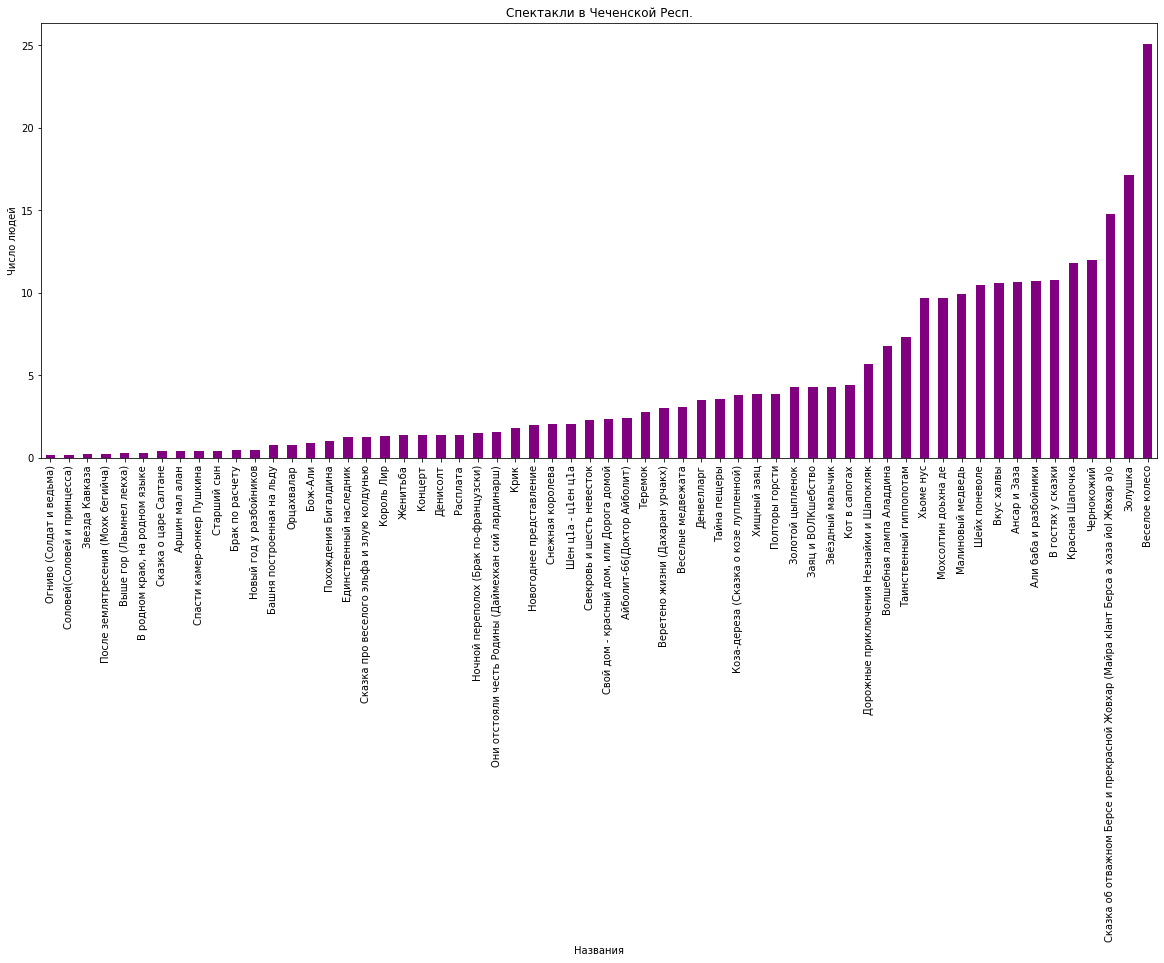

In [ ]:
mini_df2.groupby('Название произведения')["Число зрителей, тыс. чел., всего"].mean(numeric_only=True).sort_values().plot.bar(color='purple', figsize=(20, 8))
plt.title("Спектакли в Чеченской Респ.")
plt.xlabel('Названия')
plt.ylabel('Число людей')

## Как резко увеличилось количество постановок!

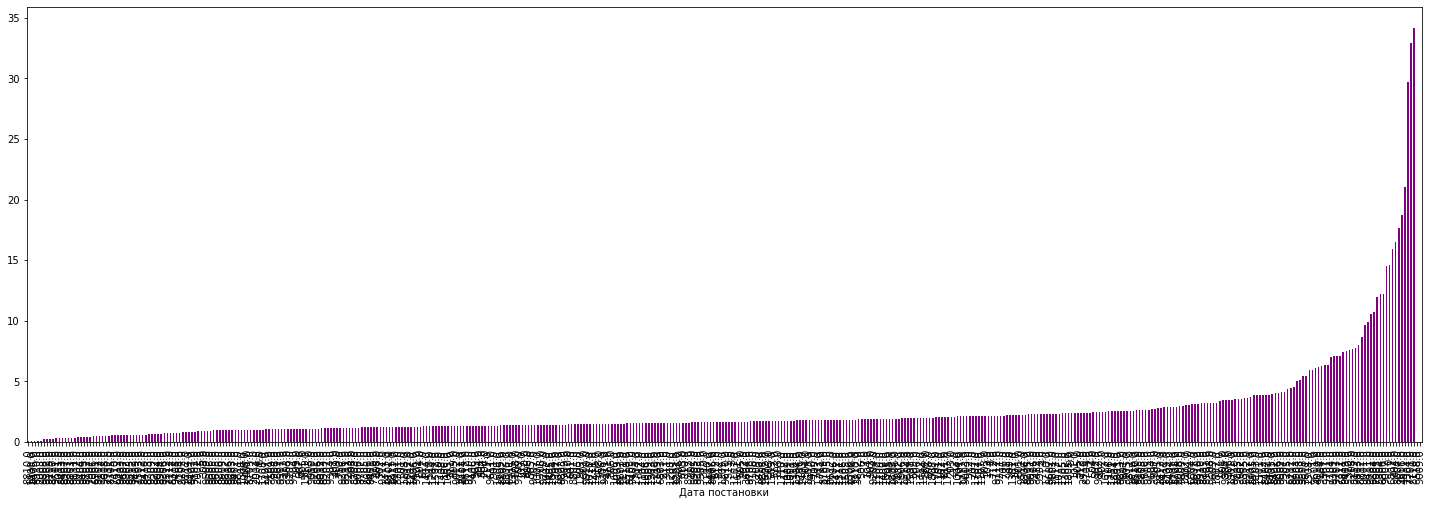

In [ ]:
dataset.groupby("Дата постановки")["Число зрителей, тыс. чел., всего"].mean(numeric_only=True).sort_values().plot.bar(color='purple', figsize=(25, 8))

([], <a list of 0 Text major ticklabel objects>)

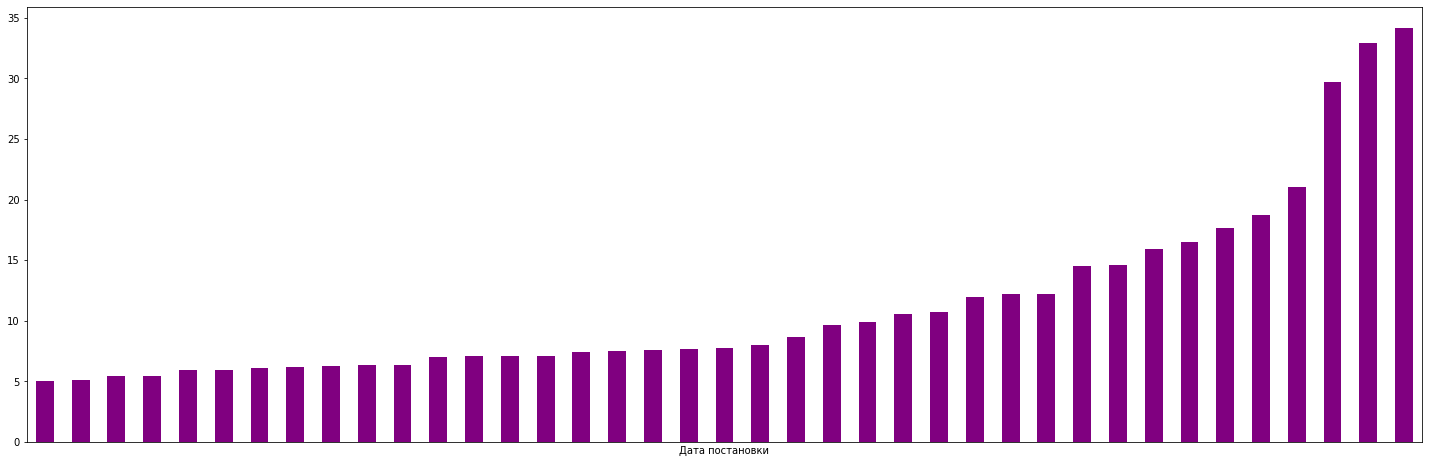

In [557]:
date_views = dataset.groupby("Дата постановки")["Число зрителей, тыс. чел., всего"].mean(numeric_only=True).sort_values()
dataset["Дата постановки"]
date_views[date_views > 5].plot.bar(color='purple', figsize=(25, 8))
plt.xticks([])

## **Какие слова в названиях встречаются чаще всего?**


In [ ]:
from pymystem3 import Mystem
m = Mystem()
import nltk
#from nltk.tokenize import word_tokenize
#nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def lemmed(s):
    s = s.lower()
    s = m.lemmatize(s)
    s = [x for x in s if x.isalpha() and x]
    s = [x for x in s if x not in stopwords.words('russian')]
    s = [x for x in s if x not in stopwords.words('english')]
    s = ' '.join(s)
    return s

In [ ]:
all_names = dataset["Название произведения"].unique().tolist()
all_names = ' '.join(all_names)
all_names = lemmed(all_names)

import collections
c = collections.Counter(all_names.split(' '))
c.most_common(30)

BrokenPipeError: ignored

In [ ]:
dataset.groupby("Название субъекта")["Жанр театра"].value_counts()

Название субъекта  Жанр театра               
Алтайский край     Драматические театры          79
                   ТЮЗы,детские театры           43
                   Театры музкомедии,оперетты    33
                   Театры кукол                  29
Амурская обл.      Драматические театры          54
                                                 ..
г.Санкт-Петербург  Театры музкомедии,оперетты    28
                   Прочие театры                 25
г.Севастополь      Драматические театры          44
                   ТЮЗы,детские театры           28
                   Прочие театры                 15
Name: Жанр театра, Length: 283, dtype: int64

In [ ]:
import collections
from pprint import pprint
c = collections.Counter()
needed_list = []
titles = []
d = {}
with open('data-2018-structure-1.csv') as f:
  reader = csv.reader(f)
  for row in reader:
    author = row[7]
    title = row[6]
    #print(row)
    if author not in d.keys():
      d[author] = []
    d[author].append(title)
  for key, value in d.items():
    l = len(value)
    d[key] = l
  sorted_values = sorted(d.values(), reverse = True) # Sort the values
  sorted_dict = {}

  for i in sorted_values:
      for k in d.keys():
        if d[k] == i:
            sorted_dict[k] = d[k]
            break

  print(sorted_dict)



{'Разные авторы': 753, 'Островский А.': 341, 'Чехов А.': 307, 'Пушкин А.': 283, 'Гоголь Н.': 241, '': 210, 'Андерсен Г.-Х.': 194, 'Чайковский П.': 189, 'Шекспир У.': 186, 'Русская народная сказка': 182, 'Перро Ш.': 156, 'Чуковский К.': 127, 'Супонин М.': 118, 'Орлов В.': 116, 'Достоевский Ф.': 115, 'Толстой А.': 112, 'Шварц Е.': 102, 'Куни Р.': 101, 'Мольер Ж.Б.': 100, 'Булгаков М.': 95, 'Верди Д.': 89, 'Остер Г.': 85, 'Андерсен Г.Х.': 82, 'Кальман И.': 80, 'Бартенев М.': 79, 'Уайльд О.': 77, 'Горький М.': 75, 'Шувалов Н.': 72, 'Пулинович Я.': 71, 'Прокофьев С.': 68, 'Гернет Н.': 65, 'Тургенев И.': 64, 'Пуччини Д.': 62, 'Гофман Э.': 61, 'Володин А.': 58, 'Коровкин А.': 57, 'Римский-Корсаков Н.': 56, 'Горин Г.': 54, 'Гольдони К.': 52, 'Штраус И.': 51, 'Камолетти М.': 50, 'Англ.сказка(инсц.Михалков': 49, 'Гладков Г.': 48, 'Белов С.': 46, 'Минкус Л.': 45, 'Ладо М.': 44, 'Шварц Е. (Перро Ш.)': 43, 'Дунаевский М.': 42, 'Гуркин В.': 41, 'Красногоров В.': 40, 'Бомарше П.': 39, 'Миннуллин Т.':

In [ ]:
db_author_new = dataset.loc[dataset['Авторы'] == "Супонин М."]
db_author_old = dataset.loc[dataset['Авторы'] == "Достоевский Ф."]

### Менеджер постановки составляет маршрут гастролей своего спектакля. В каких регионах и в каких театрах выгоднее всего появиться, чтобы получить мировую славу? Попробуем научиться предсказывать количество зрителей.

In [ ]:
dataset.head()

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре",$Название театра,$Жанр театра,$Авторы,$Жанр произведения,$Историко-национальный признак,$Национально-территориальный признак,$Возрастная категория зрителей,$Подчиненность
0,10,Респ. Адыгея,40563,347,0,9897035,Заклинаю-помните,1495,30,6,5,4,0,1712.0,21.0,16,2.67,2.21,347,0,1495,30,6,5,4,0
1,10,Респ. Адыгея,40563,347,0,5231058,Женихи,2166,11,6,5,0,0,9912.0,2.0,2,0.10,0.1,347,0,2166,11,6,5,0,0
2,10,Респ. Адыгея,40563,347,0,101095,Сказание о нарте Саусоруко,52,34,6,5,3,0,810.0,2.0,,0.32,,347,0,52,34,6,5,3,0
3,10,Респ. Адыгея,40563,347,0,9204075,Свирель Ашамеза,3709,34,6,5,3,0,1404.0,30.0,2,3.40,0.14,347,0,3709,34,6,5,3,0
4,10,Респ. Адыгея,40563,347,0,8804075,Город без любви,3578,34,5,57,3,0,1511.0,10.0,,0.70,,347,0,3578,34,5,57,3,0


In [ ]:
text_columns = ['Название театра',
       'Жанр театра', 'Авторы',
       'Жанр произведения', 'Историко-национальный признак',
       'Национально-территориальный признак', 'Возрастная категория зрителей',
       'Подчиненность']

In [ ]:
#создам датасет с нумерик вэльюз, выведу соответствия категориальных значений числовым
df = dataset.copy()
sootv = []
for i in text_columns:
  df[i] = pd.Categorical(df[i])
  df["$" + i] = df[i].cat.codes
  sootv.append(df.groupby(i)["$" + i].unique())
df.head()

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре",$Название театра,$Жанр театра,$Авторы,$Жанр произведения,$Историко-национальный признак,$Национально-территориальный признак,$Возрастная категория зрителей,$Подчиненность
0,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9897035,Заклинаю-помните,Исупов Т.,Прочие виды и жанры драмтеатра,Российские национальные произведения,Адыгея,Для юношества,Местное,1712.0,21.0,16,2.67,2.21,347,0,1495,30,6,5,4,0
1,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,5231058,Женихи,Мамий Е.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,9912.0,2.0,2,0.10,0.1,347,0,2166,11,6,5,0,0
2,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,101095,Сказание о нарте Саусоруко,Адыгейский эпос,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,810.0,2.0,,0.32,,347,0,52,34,6,5,3,0
3,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9204075,Свирель Ашамеза,Хакуй А.,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,1404.0,30.0,2,3.40,0.14,347,0,3709,34,6,5,3,0
4,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,8804075,Город без любви,Устинов Л.,Сказка,Произведения советских авторов,Россия,Для детей среднего школьного возраста,Местное,1511.0,10.0,,0.70,,347,0,3578,34,5,57,3,0


In [ ]:
df = df.drop(text_columns, axis=1)
df = df.drop(["Название произведения", "Название субъекта", "Число зрителей, тыс. чел., в том числе на стационаре"], axis=1)

In [ ]:
target = df.pop("Число зрителей, тыс. чел., всего")
df.insert(15, "VIEWERS", target)

In [ ]:
df['Код субъекта'] = pd.to_numeric(df['Код субъекта'], errors='coerce')
df['Код КОПУК'] = pd.to_numeric(df['Код КОПУК'], errors='coerce')
df['Код произведения'] = pd.to_numeric(df['Код произведения'], errors='coerce')
df['Число спектаклей, в том числе на стационаре'] = pd.to_numeric(df['Число спектаклей, в том числе на стационаре'], errors='coerce')
df['Число зрителей, тыс. чел., в том числе на стационаре'] = pd.to_numeric(df['Число зрителей, тыс. чел., в том числе на стационаре'], errors='coerce')


IndexError: ignored

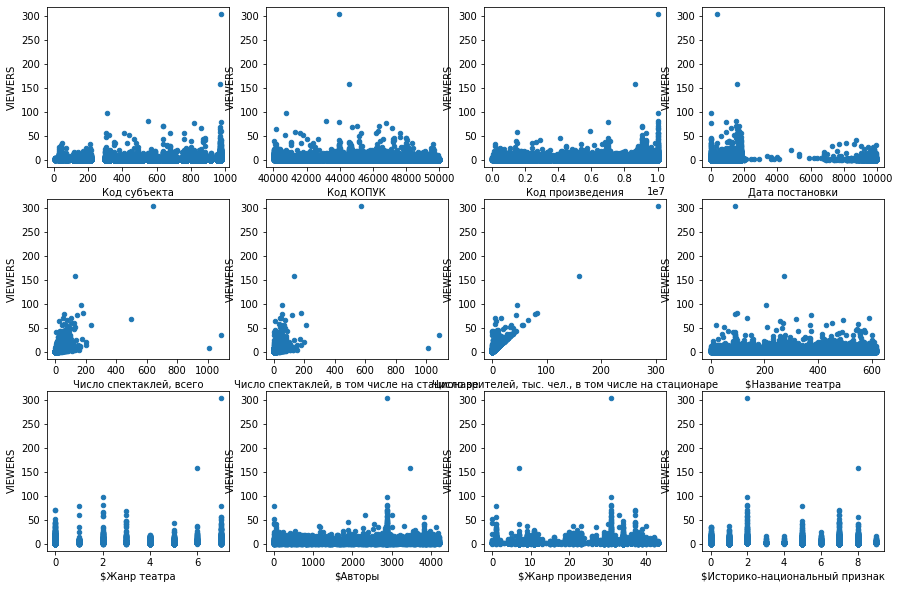

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "VIEWERS", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
plt.tight_layout()

In [ ]:
df.iloc[:,:-1].corrwith(df.iloc[:,-1])

Код субъекта                                            0.079609
Код КОПУК                                              -0.046734
Код произведения                                        0.069354
Дата постановки                                         0.012651
Число спектаклей, всего                                 0.527179
Число спектаклей, в том числе на стационаре             0.463403
Число зрителей, тыс. чел., в том числе на стационаре    0.926857
$Название театра                                       -0.014097
$Жанр театра                                            0.026752
$Авторы                                                 0.027138
$Жанр произведения                                     -0.009938
$Историко-национальный признак                         -0.044130
$Национально-территориальный признак                   -0.070696
$Возрастная категория зрителей                         -0.033765
$Подчиненность                                          0.172043
dtype: float64

In [ ]:
df.columns

Index(['Код субъекта', 'Название субъекта', 'Код КОПУК', 'Название театра',
       'Жанр театра', 'Код произведения', 'Название произведения', 'Авторы',
       'Жанр произведения', 'Историко-национальный признак',
       'Национально-территориальный признак', 'Возрастная категория зрителей',
       'Подчиненность', 'Дата постановки', 'Число спектаклей, всего',
       'Число спектаклей, в том числе на стационаре',
       'Число зрителей, тыс. чел., всего',
       'Число зрителей, тыс. чел., в том числе на стационаре'],
      dtype='object')

### Менеджер постановки составляет маршрут гастролей своего спектакля. В каких регионах и в каких театрах выгоднее всего появиться, чтобы получить мировую славу? Попробуем научиться предсказывать количество зрителей.

In [ ]:
df = pd.read_csv('data-2018-structure-1.csv')
df = df.dropna()

In [ ]:
def to_num(x):
  try:
    x = float(x)
  except ValueError:
    x = x[:4]
  return x
df['Дата постановки'] = df['Дата постановки'].apply(to_num)
df['Число спектаклей, всего'] = df['Число спектаклей, всего'].apply(to_num)
df['Число зрителей, тыс. чел., всего'] = df['Число зрителей, тыс. чел., всего'].apply(to_num)

In [ ]:
df['Число спектаклей, всего'] = pd.to_numeric(df['Число спектаклей, всего'], errors='coerce')
df['Дата постановки'] = pd.to_numeric(df['Дата постановки'], errors='coerce')
df['Число зрителей, тыс. чел., всего'] = pd.to_numeric(df['Число зрителей, тыс. чел., всего'], errors='coerce')


In [ ]:
text_columns = ['Название театра',
       'Жанр театра', 'Авторы',
       'Жанр произведения', 'Историко-национальный признак',
       'Национально-территориальный признак', 'Возрастная категория зрителей',
       'Подчиненность']

In [ ]:
#создам датасет с нумерик вэльюз, выведу соответствия категориальных значений числовым

sootv = []
for i in text_columns:
  df[i] = pd.Categorical(df[i])
  df["$" + i] = df[i].cat.codes
  sootv.append(df.groupby(i)["$" + i].unique())
df.head()

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре",$Название театра,$Жанр театра,$Авторы,$Жанр произведения,$Историко-национальный признак,$Национально-территориальный признак,$Возрастная категория зрителей,$Подчиненность
0,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9897035,Заклинаю-помните,Исупов Т.,Прочие виды и жанры драмтеатра,Российские национальные произведения,Адыгея,Для юношества,Местное,1712.0,21.0,16.0,2.67,2.21,327,0,1377,28,6,4,4,0
1,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,5231058,Женихи,Мамий Е.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,9912.0,2.0,2.0,0.10,0.10,327,0,2018,9,6,4,0,0
3,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,9204075,Свирель Ашамеза,Хакуй А.,Сказка,Российские национальные произведения,Адыгея,Для детей среднего школьного возраста,Местное,1404.0,30.0,2.0,3.40,0.14,327,0,3439,32,6,4,3,0
7,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,1104048,Кабала святош,Булгаков М.,Драма,Произведения советских авторов,Россия,Для взрослых,Местное,1711.0,10.0,2.0,1.41,0.11,327,0,479,6,5,56,0,0
9,10,Респ. Адыгея,40563,Национальный театр Республики Адыгея,Драматические театры,2010115,Слуга двух господ,Гольдони К.,Комедия,Зарубежные классические произведения,Италия,Для взрослых,Местное,1311.0,4.0,3.0,0.29,0.22,327,0,821,9,0,31,0,0


In [ ]:
df.columns

Index(['Код субъекта', 'Название субъекта', 'Код КОПУК', 'Название театра',
       'Жанр театра', 'Код произведения', 'Название произведения', 'Авторы',
       'Жанр произведения', 'Историко-национальный признак',
       'Национально-территориальный признак', 'Возрастная категория зрителей',
       'Подчиненность', 'Дата постановки', 'Число спектаклей, всего',
       'Число спектаклей, в том числе на стационаре',
       'Число зрителей, тыс. чел., всего',
       'Число зрителей, тыс. чел., в том числе на стационаре'],
      dtype='object')

In [ ]:
df = df.drop(text_columns, axis=1)
df = df.drop(["Название произведения", "Название субъекта", "Число зрителей, тыс. чел., в том числе на стационаре", "Число спектаклей, в том числе на стационаре"], axis=1)

In [ ]:
target = df.pop("Число зрителей, тыс. чел., всего")
df.insert(13, "VIEWERS", target)

In [ ]:
df['Код субъекта'] = pd.to_numeric(df['Код субъекта'], errors='coerce')
df['Код КОПУК'] = pd.to_numeric(df['Код КОПУК'], errors='coerce')
df['Код произведения'] = pd.to_numeric(df['Код произведения'], errors='coerce')


In [ ]:
df.head()

,Код субъекта,Код КОПУК,Код произведения,Дата постановки,"Число спектаклей, всего",$Название театра,$Жанр театра,$Авторы,$Жанр произведения,$Историко-национальный признак,$Национально-территориальный признак,$Возрастная категория зрителей,$Подчиненность,VIEWERS
0,10,40563,9897035,1712.0,21.0,327,0,1377,28,6,4,4,0,2.67
1,10,40563,5231058,9912.0,2.0,327,0,2018,9,6,4,0,0,0.10
3,10,40563,9204075,1404.0,30.0,327,0,3439,32,6,4,3,0,3.40
7,10,40563,1104048,1711.0,10.0,327,0,479,6,5,56,0,0,1.41
9,10,40563,2010115,1311.0,4.0,327,0,821,9,0,31,0,0,0.29


IndexError: ignored

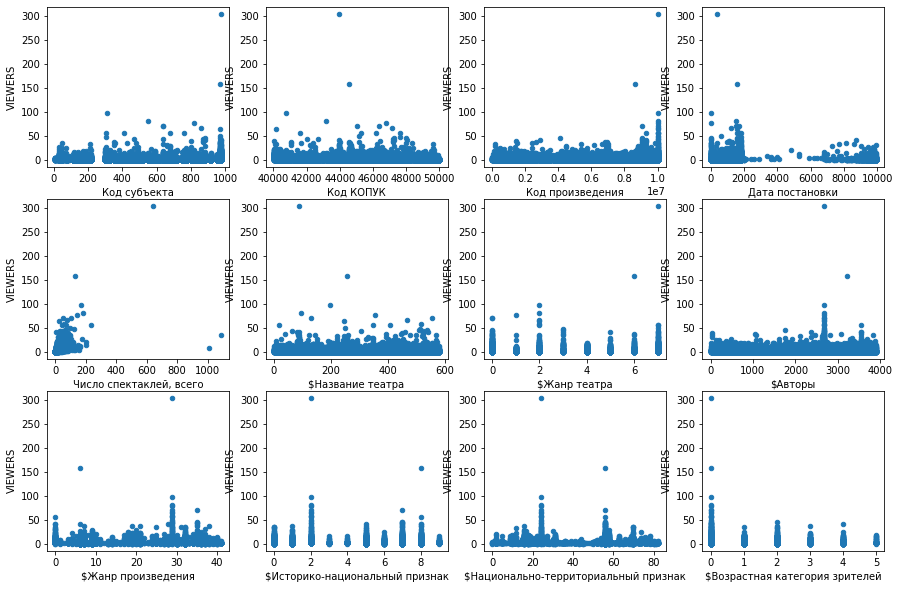

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "VIEWERS", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
plt.tight_layout()

In [ ]:
df.iloc[:,:-1].corrwith(df.iloc[:,-1])

Код субъекта                            0.081788
Код КОПУК                              -0.047894
Код произведения                        0.068519
Дата постановки                         0.016606
Число спектаклей, всего                 0.512277
$Название театра                       -0.012816
$Жанр театра                            0.027349
$Авторы                                 0.033432
$Жанр произведения                     -0.011494
$Историко-национальный признак         -0.045131
$Национально-территориальный признак   -0.068625
$Возрастная категория зрителей         -0.031791
$Подчиненность                          0.177613
dtype: float64

### *Мы видим, что корреляция между признаками нелинейная, исключая ЧИСЛО СПЕКТАКЛЕЙ.   Можно сделать вывод, что от числа спектаклей зависит количество зрителей, что логично *

In [ ]:
df.columns

Index(['Код субъекта', 'Код КОПУК', 'Код произведения', 'Дата постановки',
       'Число спектаклей, всего', '$Название театра', '$Жанр театра',
       '$Авторы', '$Жанр произведения', '$Историко-национальный признак',
       '$Национально-территориальный признак',
       '$Возрастная категория зрителей', '$Подчиненность', 'VIEWERS'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df.isnull().sum()

Код субъекта                            0
Код КОПУК                               0
Код произведения                        0
Дата постановки                         0
Число спектаклей, всего                 0
$Название театра                        0
$Жанр театра                            0
$Авторы                                 0
$Жанр произведения                      0
$Историко-национальный признак          0
$Национально-территориальный признак    0
$Возрастная категория зрителей          0
$Подчиненность                          0
VIEWERS                                 0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
linspace = np.linspace(0, 40, 1000)[:, np.newaxis]

model = LinearRegression()
X = df[["Число спектаклей, всего"]]
y = df[["VIEWERS"]]
X_test = linspace
model.fit(X, y)
y_test = model.predict(X_test)

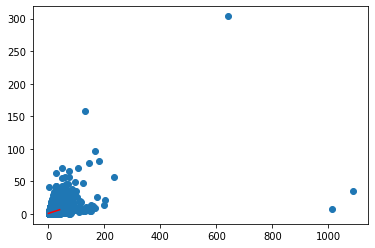

In [ ]:
plt.scatter(df["Число спектаклей, всего"], df["VIEWERS"])
plt.plot(linspace.ravel(), y_test, c='r')

Теперь попробуем научиться предсказывать жанр

In [ ]:
df.columns

Index(['Код субъекта', 'Код КОПУК', 'Код произведения', 'Дата постановки',
       'Число спектаклей, всего', '$Название театра', '$Жанр театра',
       '$Авторы', '$Жанр произведения', '$Историко-национальный признак',
       '$Национально-территориальный признак',
       '$Возрастная категория зрителей', '$Подчиненность', 'VIEWERS'],
      dtype='object')

In [ ]:
target_new = df.pop("$Жанр произведения")
df.insert(13, "GENRE", target)
df.columns

Index(['Код субъекта', 'Код КОПУК', 'Код произведения', 'Дата постановки',
       'Число спектаклей, всего', '$Название театра', '$Жанр театра',
       '$Авторы', '$Историко-национальный признак',
       '$Национально-территориальный признак',
       '$Возрастная категория зрителей', '$Подчиненность', 'VIEWERS', 'GENRE'],
      dtype='object')

In [ ]:
df["GENRE"] = df["GENRE"].apply(lambda x: int(x))
X = df[df.columns[:-1]]
y = df[[df.columns[-1]]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)
sgd = SGDClassifier()

In [ ]:
sgd.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
X = df.drop("VIEWERS", axis = 1)
y = df["VIEWERS"]

In [ ]:
predict_test = sgd.predict(X_test)
predict_test[:5], y_test[:5]

(array([0, 0, 0, 0, 0]),        GENRE
 10942      0
 13370      1
 5072       0
 9529       1
 1846       0)

In [ ]:
accuracy_score(y_test, predict_test)

0.4829971181556196